<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/Sineng_CT_Report/SINENG_INVERTER_CT_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/SINENG_INVERTER CT REPORT.xlsx'  # Replace with the path to your file
# df = pd.read_excel(file_path)

df = pd.read_excel(file_path, header=None)  # Load without assigning headers
print("Preview of Raw Data:")
print(df.head(10))

# Reload with appropriate header row (after identifying the correct row)
df = pd.read_excel(file_path, header=9)  # Adjust the header index as needed
print("Initial Shape of the Dataset:", df.shape)

# Drop completely empty rows and columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

# Handle rows/columns with significant missing values
df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)  # Drop rows with >50% missing
df = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)  # Drop columns with >50% missing

# Remove "Unnamed" columns if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("Final Shape of the cleaned Dataset:", df.shape)

# Save the cleaned dataset
output_path = '/content/Updated_Dataset_From_Jupyter.xlsx'
df.to_excel(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

#-------------------------------------------------------------------------------#

# # Display initial shape
# print("Initial Shape of the Dataset:", df.shape)

# # Step 1: Drop rows where all columns are NaN
# df = df.dropna(how='all')

# # Step 2: Drop columns where all rows are NaN
# df = df.dropna(axis=1, how='all')

# # Step 3: Optionally, drop rows/columns with a threshold of missing values
# # For example, drop rows where more than 50% of the values are missing
# df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)  # Adjust threshold as needed

# # Step 4: Drop columns where more than 50% of the values are missing
# df = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)

# # Display final shape
# print("Final Shape of the Dataset:", df.shape)

# # Save the cleaned dataset to a new Excel file
# output_path = '/content/Updated_Dataset_From_Jupyter.xlsx'
# df.to_excel(output_path, index=False)
# print(f"Cleaned dataset saved to: {output_path}")

Preview of Raw Data:
                                                  0            1   \
0  300 MW SOLAR PLANT,AVAADA SUNRISE ENERGY PVT L...          NaN   
1                                                NaN          NaN   
2  SINENG Inverter CT Report  ( 4/24/2024 12:00:0...          NaN   
3                                                NaN          NaN   
4                                                NaN          NaN   
5                                                NaN      ICR1      
6                                                NaN          NaN   
7                                                NaN         INV1   
8                                                NaN          NaN   
9                                                NaN   Time Stamp   

              2             3             4             5             6   \
0            NaN           NaN           NaN           NaN           NaN   
1            NaN           NaN           NaN           NaN         

In [40]:
# # Step 1: Data Cleaning
# # Remove rows and columns with all NaN values
# df = df.dropna(how='all')
# df = df.dropna(axis=1, how='all')

# # Drop rows/columns with more than 50% missing values (optional)
# df = df.dropna(thresh=int(0.5 * df.shape[1]), axis=0)  # Rows
# df = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)  # Columns

# # Fill missing values with appropriate methods (mean, median, etc.)
# df = df.fillna(df.mean(numeric_only=True))  # Fill numeric columns with the mean

# # Display the cleaned dataset's shape
# print("\nCleaned Dataset Shape:", df.shape)


Cleaned Dataset Shape: (1441, 22)


In [41]:
# Step 2: Basic Data Exploration
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for remaining missing values
print("\nMissing Values in Cleaned Dataset:")
print(df.isnull().sum())


Summary Statistics:
                          Time Stamp
count                           1440
mean   2024-04-24 11:59:50.001388800
min              2024-04-24 00:00:20
25%              2024-04-24 06:00:05
50%              2024-04-24 11:59:50
75%              2024-04-24 17:59:35
max              2024-04-24 23:59:20

Missing Values in Cleaned Dataset:
Time Stamp       1
CT1 \nCurrent    0
CT2\nCurrent     0
CT3\nCurrent     0
CT4\nCurrent     0
CT5\nCurrent     0
CT6\nCurrent     0
CT7\nCurrent     0
CT8\nCurrent     0
CT9\nCurrent     0
CT10\nCurrent    0
CT11\nCurrent    0
CT12\nCurrent    0
CT13\nCurrent    0
CT14\nCurrent    0
CT15\nCurrent    0
CT16\nCurrent    0
CT17\nCurrent    0
CT18\nCurrent    0
CT19\nCurrent    0
CT20\nCurrent    0
CT21\nCurrent    0
dtype: int64


In [42]:
# Step 3: Time Series Analysis (if time-based data exists)
if 'period_end' in df.columns:
    df['period_end'] = pd.to_datetime(df['period_end'])  # Convert to datetime
    plt.figure(figsize=(12, 6))
    plt.plot(df['period_end'], df.iloc[:, 1:].sum(axis=1))  # Sum values across columns
    plt.title("Overall Trends Over Time")
    plt.xlabel("Time")
    plt.ylabel("Sum of Values")
    plt.grid(True)
    plt.show()

Time Stamp        int64
CT1 \nCurrent    object
CT2\nCurrent     object
CT3\nCurrent     object
CT4\nCurrent     object
CT5\nCurrent     object
CT6\nCurrent     object
CT7\nCurrent     object
CT8\nCurrent     object
CT9\nCurrent     object
CT10\nCurrent    object
CT11\nCurrent    object
CT12\nCurrent    object
CT13\nCurrent    object
CT14\nCurrent    object
CT15\nCurrent    object
CT16\nCurrent    object
CT17\nCurrent    object
CT18\nCurrent    object
CT19\nCurrent    object
CT20\nCurrent    object
CT21\nCurrent    object
dtype: object
Time Stamp         int64
CT1 \nCurrent    float64
CT2\nCurrent      object
CT3\nCurrent      object
CT4\nCurrent      object
CT5\nCurrent      object
CT6\nCurrent      object
CT7\nCurrent      object
CT8\nCurrent      object
CT9\nCurrent      object
CT10\nCurrent     object
CT11\nCurrent     object
CT12\nCurrent     object
CT13\nCurrent     object
CT14\nCurrent     object
CT15\nCurrent     object
CT16\nCurrent     object
CT17\nCurrent     object
CT18\nCu

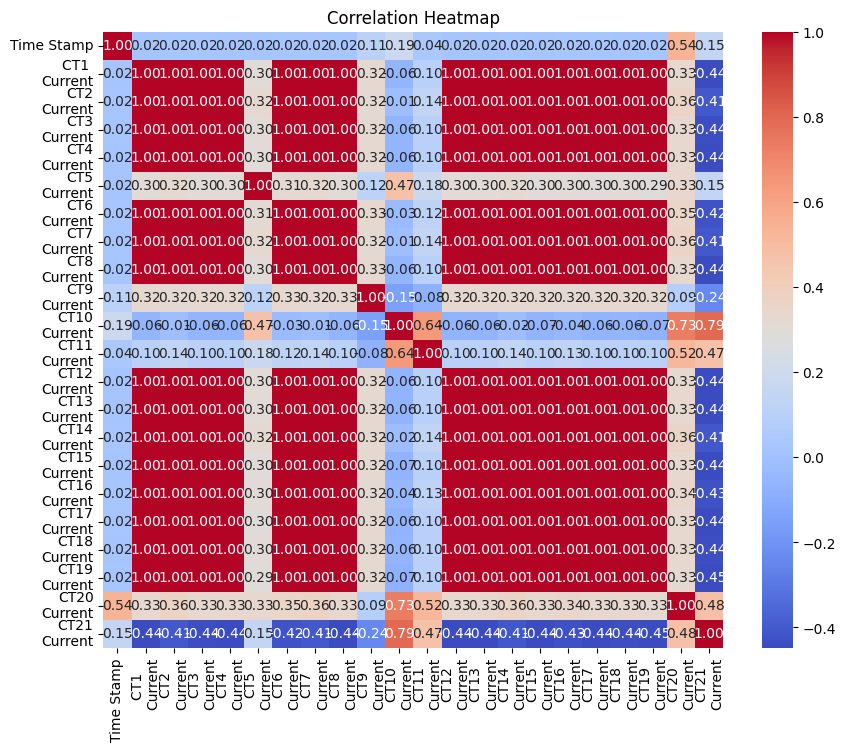

In [43]:
# print(df.dtypes)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df.fillna(0, inplace=True)  # Replace NaN with 0
    print(df.dtypes)
# Step 4: Correlation Analysis
# Calculate and display a heatmap of correlations
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
if not numeric_columns.empty:
    correlation_matrix = df[numeric_columns].corr()
    if not correlation_matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("\nNo correlations to display: Correlation matrix is empty.")
else:
    print("\nNo numeric columns available for correlation analysis.")

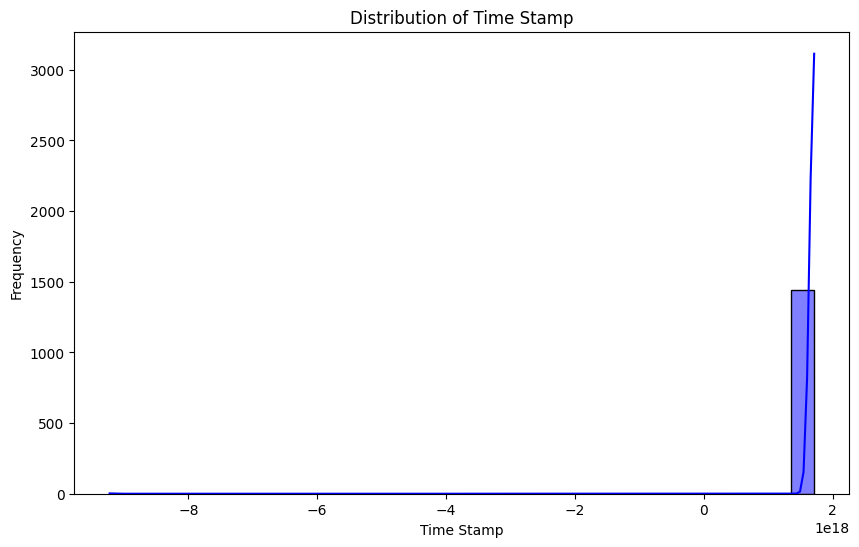

In [44]:
# Step 5: Distribution of Key Columns
# Visualize the distribution of the first numeric column (example)
if not numeric_columns.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numeric_columns[0]], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {numeric_columns[0]}")
    plt.xlabel(numeric_columns[0])
    plt.ylabel("Frequency")
    plt.show()

In [46]:
# Step 6: Aggregation (Group by Date or Other Categorical Variable)
if 'period_end' in df.columns:
    df['date'] = df['period_end'].dt.date  # Extract the date part
    daily_summary = df.groupby('date').sum(numeric_only=True)

    # Plot daily trends
    plt.figure(figsize=(12, 6))
    plt.plot(daily_summary.index, daily_summary.sum(axis=1))
    plt.title("Daily Trends")
    plt.xlabel("Date")
    plt.ylabel("Sum of Values")
    plt.grid(True)
    plt.show()

In [47]:
# Step 7: Anomaly Detection (Simple Threshold Method)
if not numeric_columns.empty:
    threshold = df[numeric_columns[0]].mean() + 3 * df[numeric_columns[0]].std()
    anomalies = df[df[numeric_columns[0]] > threshold]

    print("\nAnomalies Detected:")
    print(anomalies)

    # Save anomalies to an Excel file
    anomalies_output_path = '/content/anomalies.xlsx'
    anomalies.to_excel(anomalies_output_path, index=False)
    print(f"Anomalies saved to {anomalies_output_path}")


Anomalies Detected:
Empty DataFrame
Columns: [Time Stamp, CT1 
Current, CT2
Current, CT3
Current, CT4
Current, CT5
Current, CT6
Current, CT7
Current, CT8
Current, CT9
Current, CT10
Current, CT11
Current, CT12
Current, CT13
Current, CT14
Current, CT15
Current, CT16
Current, CT17
Current, CT18
Current, CT19
Current, CT20
Current, CT21
Current]
Index: []

[0 rows x 22 columns]
Anomalies saved to /content/anomalies.xlsx


In [48]:

# Step 8: Save the Cleaned Dataset
cleaned_output_path = '/content/cleaned_dataset.xlsx'
df.to_excel(cleaned_output_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_output_path}")



Cleaned dataset saved to /content/cleaned_dataset.xlsx
